In [3]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import networkx as nx
import tqdm

from IPython.display import HTML, display

from utility.load_data import DataLoader
from utility.stats import rank_players_by_stat, get_players_sorted_by_stat
from utility.graphs import generate_match_up_graph, generate_team_graph

# Load the datasets.
data = DataLoader(path='../data/all_seasons/')

# Player Activity

### Veteran Players

A ranking of all players by their number of games they played in the 45+45 league. I filtered out all players that played less than 10 games in the league.

In [2]:
table = rank_players_by_stat(data.players, 'games', lambda tup: tup[-1] >= 10)

display(HTML("<div align=\"center\" style='height: 300px; overflow: auto'>" + table + "</div>"))

rank,name,games
1,scarff,211
2,glbert,177
3,forhavu,175
4,sgis,172
5,eie24,170
6,seb32,168
7,gokuba,162
8,zher0,151
9,tranzoo,150
10,brundd,148


### Game Distribution

The next diagram shows a distribution of the number of games played in the league. The x axis displays the number of games played and the y axis the number of players with that many games. As expected, there are a lot of players that played <50 games but very few with >50 games.

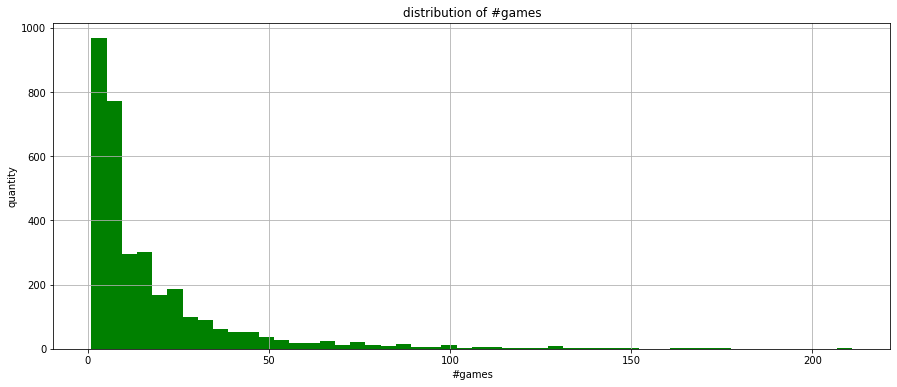

In [7]:
num_games = [player['games'] for player in data.players.values()]

plt.rcParams['figure.figsize'] = [15, 6]
n, bins, patches = plt.hist(num_games, 50, density=False, facecolor='g')
plt.xlabel('#games')
plt.ylabel('quantity')
plt.title('distribution of #games')
plt.grid(True)
plt.show()

# Player Strength

### Active Players by Strength

In [4]:
# Define a player to be active if they have played a game in the last five seasons.
is_active = lambda tup: set(data.players[tup[0]]['seasons']) & {27, 28, 29, 30, 31}

table = rank_players_by_stat(data.players, 'rating', is_active)

display(HTML("<div align=\"center\"  style='height: 300px; overflow: auto'>" + table + "</div>"))

rank,name,rating
1,moistvonlipwig,2408
2,fearlessking64,2406
3,ajolote4,2398
4,nomate4u,2371
5,like-a-hurricane,2365
6,budspenser,2365
7,lelouch_vi_brittania,2362
8,wookash_888,2361
9,erinyu,2336
10,isavulpes,2333


### Rating Distribution

Let's now look at the distribution of ratings in the league. We will exclude players with closed accounts (encoded in the data via *rating = -1*) and no games in the previous five seasons.

In [8]:
num_games = [stats['rating'] for player, stats in data.players.items() if (stats['rating'] != -1 and is_active((player, stats)))]

plt.rcParams['figure.figsize'] = [15, 6]
n, bins, patches = plt.hist(num_games, 50, density=False, facecolor='g')
plt.xlabel('rating')
plt.ylabel('quantity')
plt.title('rating distribution')
plt.grid(True)
plt.show()

NameError: name 'is_active' is not defined

### Rating and Number of Games

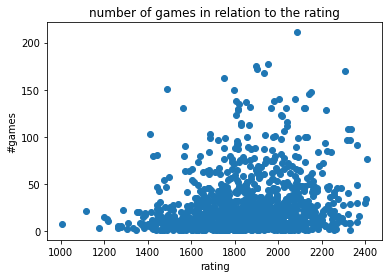

In [6]:
players = [(player, stats) for (player, stats) in data.players.items() if (stats['rating'] != -1 and is_active((player, stats)))]
ratings = [stats['rating'] for (player, stats) in players]
games = [stats['games'] for (player, stats) in players]

plt.rcParams['figure.figsize'] = [15, 6]
plt.scatter(ratings, games)
plt.xlabel('rating')
plt.ylabel('#games')
plt.title('number of games in relation to the rating')
plt.show()

# Player Relations

> **Warning:**
> These visualizations are still work in progress. For example, I'm still looking for a way to display name tags for nodes once the user has zoomed in far enough.

### Rivalries

The next visualization shows games played between different players. 


**Nodes**: Each sphere represents a player. Their size is determined by the number of games they played in the 45+45 league. The colors range from dark purple to white and represent the strength of the corresponding player (with white being the strongest). I've assigned the initial rating of 1500 to closed accounts.


**Edges**: Each edge between two players shows that they have played atleast one game against each other. The edge width is determined by the number of games they played against each other.

Please note that the graph only shows players who have played atleast 50 games in the league. This is to keep the graph smaller. Feel free to download the code and try out other settings of *min_games*.

The distance between nodes is computed by an algorithm that treats the edges as springs which attract the connected nodes with a force depending on its weight. This results in "similar players" (i.e. having played more games against each other or against the same players) being closer together.

In [5]:
generate_match_up_graph(data.match_ups, data.players, min_games=50)

Loading BokehJS ...

### Friendships

The same principles as before but 
1. this time each edge means that the corresponding players have played together on the same team multiple times
2. the size of each node represents the number of seasons the player has played already.

In order to keep the graph more clear, I'm only showing players that have played atleast five seasons in the league and only edges for players who have played together on at least three different teams. As usual, feel free to run the visualizations yourself with adjusted parameters *min_seasons* and *min_seasons_together*.

In [8]:
generate_team_graph(data.teams, data.players, min_seasons=5, min_seasons_together=3)

Loading BokehJS ...